# Analyse de données et grands systèmes linéaires

### Importation des bibliothèques système permettant l'éxecution du programme

In [738]:
%matplotlib inline

In [739]:
from matplotlib.pyplot import * 
from numpy import * 
from scipy import * 
from scipy.sparse import * 
from numpy.linalg import *

## I. Introduction au problème :

Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ 

## II. Résolution du probléme :

### (a) Initialiser la matrice du système $K ∈ ℝ^{n*n} $ et le vecteur $f ∈ ℝ^n $ :
Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ <br/><br/>
Ou la matrice $In$ est la matrice identité, $⊗$ est le produit de Kronecker.

In [740]:
n = 5
I = eye(n)
A = diags([-1,2,-1], [-1,0,1], shape = (n, n))

In [741]:
print(I)# matrice identité
print(A)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (1, 0)	-1.0
  (2, 1)	-1.0
  (3, 2)	-1.0
  (4, 3)	-1.0
  (0, 0)	2.0
  (1, 1)	2.0
  (2, 2)	2.0
  (3, 3)	2.0
  (4, 4)	2.0
  (0, 1)	-1.0
  (1, 2)	-1.0
  (2, 3)	-1.0
  (3, 4)	-1.0


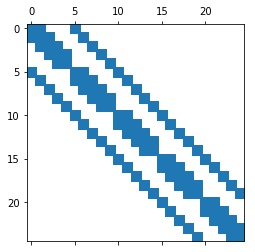

In [742]:
kron(A, I)#le produit de Kronecker
spy(A)
spy(kron(A, I))
K = kron(I, A) + kron(A, I)
spy(K)

In [743]:
print(K)

  (0, 0)	4.0
  (0, 1)	-1.0
  (0, 2)	0.0
  (0, 3)	0.0
  (0, 4)	0.0
  (1, 0)	-1.0
  (1, 1)	4.0
  (1, 2)	-1.0
  (1, 3)	0.0
  (1, 4)	0.0
  (2, 0)	0.0
  (2, 1)	-1.0
  (2, 2)	4.0
  (2, 3)	-1.0
  (2, 4)	0.0
  (3, 0)	0.0
  (3, 1)	0.0
  (3, 2)	-1.0
  (3, 3)	4.0
  (3, 4)	-1.0
  (4, 0)	0.0
  (4, 1)	0.0
  (4, 2)	0.0
  (4, 3)	-1.0
  (4, 4)	4.0
  :	:
  (20, 20)	4.0
  (20, 21)	-1.0
  (20, 22)	0.0
  (20, 23)	0.0
  (20, 24)	0.0
  (21, 20)	-1.0
  (21, 21)	4.0
  (21, 22)	-1.0
  (21, 23)	0.0
  (21, 24)	0.0
  (22, 20)	0.0
  (22, 21)	-1.0
  (22, 22)	4.0
  (22, 23)	-1.0
  (22, 24)	0.0
  (23, 20)	0.0
  (23, 21)	0.0
  (23, 22)	-1.0
  (23, 23)	4.0
  (23, 24)	-1.0
  (24, 20)	0.0
  (24, 21)	0.0
  (24, 22)	0.0
  (24, 23)	-1.0
  (24, 24)	4.0


nous avons fini avec l'initialisation de la matrice du système $K$, alors maintenant, on va initialiser le vecteur $f ∈ ℝ^n$ tel que pour tout n il faut utiliser les vecteurs $e1$ et $en$ de la base canonique de $ℝ^n$ où:
$f = (e1 ⊗ h) + (g ⊗ e1) + (en ⊗ b) + (d ⊗ en)$ <br/>
$e1 = $$\begin{pmatrix}1 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ en = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ h = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ g = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ b = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ d = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ <br/>

In [744]:
e1 = 0 * ones(n)
e1[0] = 1
en = 0 * ones(n) 
en[n - 1] = 1

In [745]:
print("e1 = ", e1)
print("en = ", en)

e1 =  [ 1.  0.  0.  0.  0.]
en =  [ 0.  0.  0.  0.  1.]


In [746]:
h = 1 * ones(n)
g = 0 * ones(n)
b = 0 * ones(n)
d = 1 * ones(n)

In [747]:
print("h = ", h)
print("g = ", g)
print("b = ", b)
print("d = ", d)

h =  [ 1.  1.  1.  1.  1.]
g =  [ 0.  0.  0.  0.  0.]
b =  [ 0.  0.  0.  0.  0.]
d =  [ 1.  1.  1.  1.  1.]


In [748]:
f = kron(e1, h) + kron(g, e1) + kron(en, b) + kron(d, en)
f = transpose(f)

In [749]:
print(f)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	2.0
  (5, 0)	0.0
  (6, 0)	0.0
  (7, 0)	0.0
  (8, 0)	0.0
  (9, 0)	1.0
  (10, 0)	0.0
  (11, 0)	0.0
  (12, 0)	0.0
  (13, 0)	0.0
  (14, 0)	1.0
  (15, 0)	0.0
  (16, 0)	0.0
  (17, 0)	0.0
  (18, 0)	0.0
  (19, 0)	1.0
  (20, 0)	0.0
  (21, 0)	0.0
  (22, 0)	0.0
  (23, 0)	0.0
  (24, 0)	1.0


### (b) Résolution des problèmes de moindres carrés :

Dans un premier temps, on va utiliser le système linéaire : $K . u = f$ pour chercher une solution approchée du système dans un sous-espace vectoriel $E ∈ ℝ^n$ de dimension $k << n$, on note la matrice $V ∈ ℝ^{n * K}$ ayant pour colonnes les k vectuers d'une base du sous espace E. tout vecteur  $v ∈ E $ s'écrit donc $v = V * α$ avec $α ∈ R^k$.
La solution $v ∈ E$ est donc obtenue en résolvant le problème des moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - f||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$

In [750]:
v0 = solve(K.toarray(), f.toarray())

In [751]:
print(v0)#une première aproximation de u

[[ 0.5       ]
 [ 0.7010101 ]
 [ 0.8040404 ]
 [ 0.87474747]
 [ 0.93737374]
 [ 0.2989899 ]
 [ 0.5       ]
 [ 0.64040404]
 [ 0.75757576]
 [ 0.87474747]
 [ 0.1959596 ]
 [ 0.35959596]
 [ 0.5       ]
 [ 0.64040404]
 [ 0.8040404 ]
 [ 0.12525253]
 [ 0.24242424]
 [ 0.35959596]
 [ 0.5       ]
 [ 0.7010101 ]
 [ 0.06262626]
 [ 0.12525253]
 [ 0.1959596 ]
 [ 0.2989899 ]
 [ 0.5       ]]


Là, o, puet chercher une approximation $v$ dans le sous espace affine $v0 + E$, sachant que pour tout vecteur $v ∈ v0 + E$ s'écrit $v = v0 + V * α$, cela conduit à considérer le problème de moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - r0||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$<br />
Avec $ r0 = f - k * v0 $ est le résidu obtenu pour l'approximation $v0$.<br />
Soit $αk$ la solution du problème (2) alors : $ rk = r0 - K * V * αk $ le résidu obtenu à partir de $αk$

In [752]:
r0 = f - K * v0#le résidu obtenu par l'approximation v0

In [753]:
print(r0)

[[  0.00000000e+00]
 [ -4.44089210e-16]
 [  2.22044605e-16]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.11022302e-16]
 [  2.22044605e-16]
 [ -1.11022302e-16]
 [  4.44089210e-16]
 [  5.55111512e-16]
 [  2.77555756e-17]
 [  1.11022302e-16]
 [  1.66533454e-16]
 [ -3.88578059e-16]
 [  0.00000000e+00]
 [  1.38777878e-17]
 [  8.32667268e-17]
 [ -5.55111512e-17]
 [  2.22044605e-16]
 [ -4.44089210e-16]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.11022302e-16]
 [  2.22044605e-16]
 [  0.00000000e+00]]


On va implémenter le procédé d'orthonormalisation de Gram-Schmidt en utilisant les bibliothèques systèmes de numpy, où $Q$ est un matrice orthogonale c'est à dire $A^t . A = A . A^t = In$ et $R$ est une matrice triangulaire supérieure.

In [754]:
def gram_schmidt(M):
    Q, R = np.linalg.qr(M)
    return Q, R

In [755]:
def moindres_carrés(K, f, v0, k):
    residus = [norm(r0)]
    V = r0
    M = K * V
    Q, R = gram_schmidt(M)
    q = (1 / norm(Q)) * Q
    rk = r0
    
    if (k <= 1):
        α = solve_triangular(R, Q.transpose() * r0, lower = False)
        v = v0 + V * α
        return residus, v, V, Q, R
    
    for i in range(2, k + 1):
        temp = q.transpose() * r0
        rk = rk - q * temp
        a = K * rk
        b = Q.transpose() * a
        s = norm(a - Q * b)
        q = (1 / s) * (a - Q * b)
        
        V = bmat([[V, rk], [None, None]])
        R = bmat([[R, b], [None, s]])
        Q = bmat([[Q, q], [None, None]])
        
        residus.append(norm(rk))
    
    α = solve_triangular(R.todense(), Q.transpose() * r0, lower = False)
    v = v0 + V * α
    return residus, v, V, Q, R
        
print(moindres_carrés(K, f, v0, 1))

([1.1558622765803136e-15], matrix([[ 0.5       ],
        [ 0.7010101 ],
        [ 0.8040404 ],
        [ 0.87474747],
        [ 0.93737374],
        [ 0.2989899 ],
        [ 0.5       ],
        [ 0.64040404],
        [ 0.75757576],
        [ 0.87474747],
        [ 0.1959596 ],
        [ 0.35959596],
        [ 0.5       ],
        [ 0.64040404],
        [ 0.8040404 ],
        [ 0.12525253],
        [ 0.24242424],
        [ 0.35959596],
        [ 0.5       ],
        [ 0.7010101 ],
        [ 0.06262626],
        [ 0.12525253],
        [ 0.1959596 ],
        [ 0.2989899 ],
        [ 0.5       ]]), matrix([[  0.00000000e+00],
        [ -4.44089210e-16],
        [  2.22044605e-16],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  1.11022302e-16],
        [  2.22044605e-16],
        [ -1.11022302e-16],
        [  4.44089210e-16],
        [  5.55111512e-16],
        [  2.77555756e-17],
        [  1.11022302e-16],
        [  1.66533454e-16],
        [ -3.88578059e-16],
    

### (c) Implémentation de la méthode restarting :